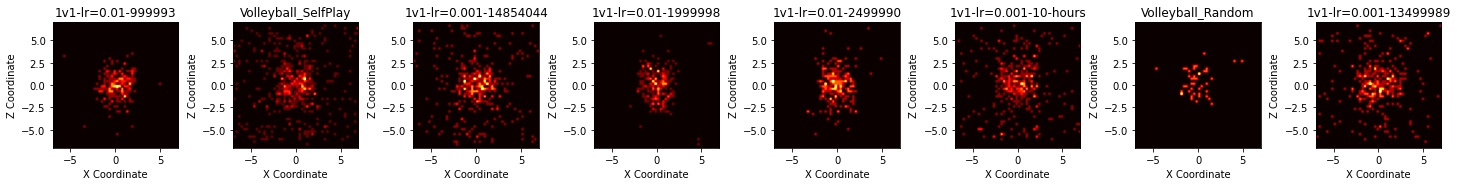

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import re

# Read data from file
file_path = "ballTouches.txt"
with open(file_path, "r") as file:
    logs = file.read()

# Parse the logs to extract behavior and locations
data = defaultdict(list)
pattern = r"'behaviorName': '([^']+)', 'location': '\(([^)]+)\)'"
matches = re.findall(pattern, logs)

for behavior, location in matches:
    coords = tuple(map(float, location.split(", ")))
    data[behavior].append(coords)

# Plotting heatmaps
fig, axes = plt.subplots(1, len(data), figsize=(20, 6), constrained_layout=True)

for ax, (behavior, locations) in zip(axes, data.items()):
    locations = np.array(locations)
    x, y = locations[:, 0], locations[:, 2]  # Take x and z coordinates
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50, range=[[-7, 7], [-7, 7]])

    # Plot heatmap
    ax.imshow(heatmap.T, origin='lower', cmap='hot', extent=[-7, 7, -7, 7])
    ax.set_title(behavior)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Z Coordinate')

plt.show()
